<a href="https://colab.research.google.com/github/adigapranava/ML_Project/blob/main/NEWS_ML_PROJECTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREATING A DATABASE 😎
Scrape data from [IndianExpress News Website](https://indianexpress.com/) for diffrent topic and save it to data base.

### Collect Sports 🤾🏻‍♂️

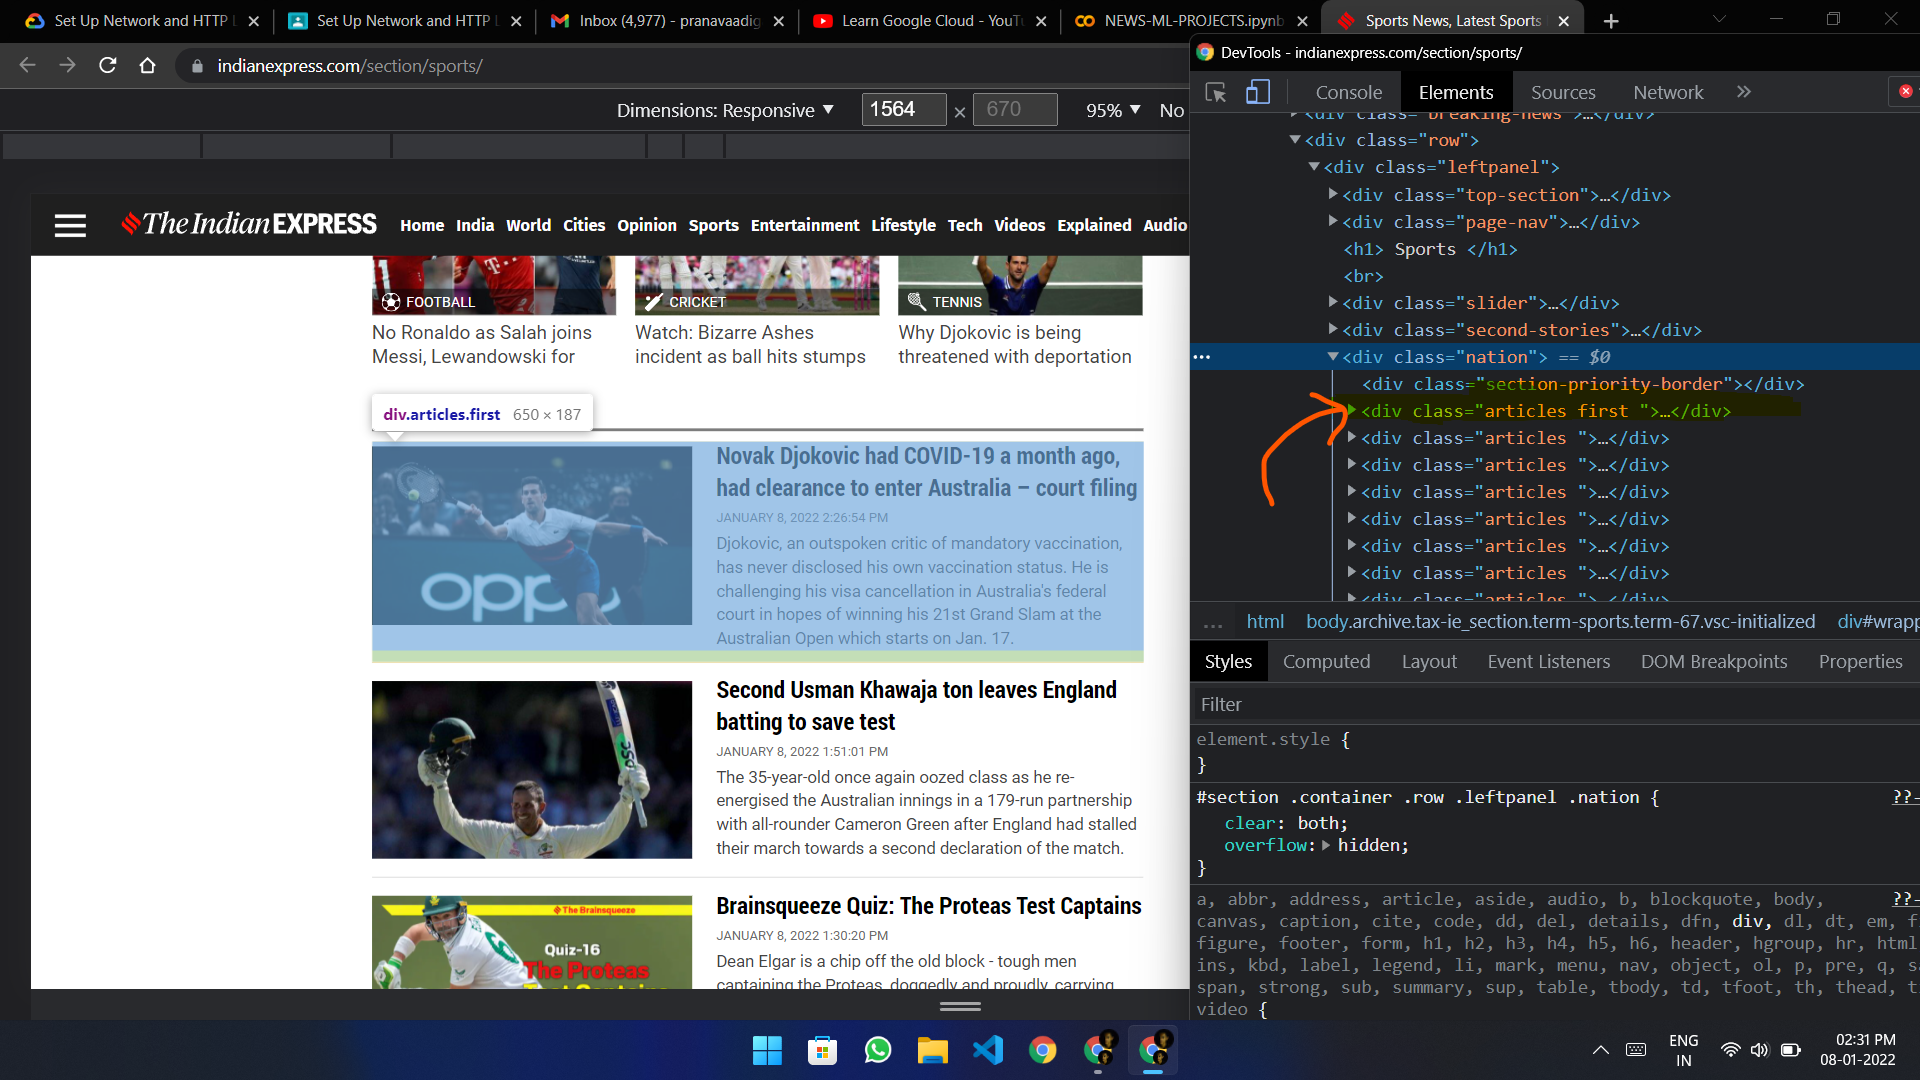

In [1]:
def collectSportsNews(): 
  URL = "https://indianexpress.com/section/sports/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "SPORTS"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "SPORTS"))
    connection.commit()
  print(news_list)

### Collect Entertainment Data 🎭

In [2]:
def collectEntertainmentData(): 
  URL = "https://indianexpress.com/section/entertainment/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "ENTERTAINMENT"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "ENTERTAINMENT"))
    connection.commit()
  print(news_list)

### Collect Tech Data 🧑🏻‍💻

In [3]:
def collectTechData(): 
  URL = "https://indianexpress.com/section/technology/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  # selected = soup.find('ul', attrs = {'class':'article-list'}) 
  # newss = selected.findAll('li')
  # for news in newss:
  #   c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.findAll('a')[1].text, "TECH"))
  for i in range(100,106):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('ul', attrs = {'class':'article-list'}) 
    newss = selected.findAll('li')
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.findAll('a')[1].text, "TECH"))
    connection.commit()

### Get Business Data 👨🏻‍💼

In [4]:
def collectBusinessData(): 
  URL = "https://indianexpress.com/section/business/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "BUSINESS"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "BUSINESS"))
    connection.commit()
  print(news_list)

### Get Educational Data 📖

In [5]:
def collectEducationData(): 
  URL = "https://indianexpress.com/section/education/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "EDUCATION"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "EDUCATION"))
    connection.commit()
  print(news_list)

In [6]:
def getAllInfoData():
  c.execute("SELECT Category , COUNT(*) FROM NEWS Group by Category")
  print(c.fetchall())

# Asli Game Shuru 🚩

In [1]:
import sqlite3
import requests
from bs4 import BeautifulSoup
import os

# if db not exist then ask and scrape 
if not (os.path.isfile("News.db")): 
  print("#"*50)
  choice = input("Can I scrape the data from net? Y-n: ")
  if (choice.lower() == "y" or choice.lower() ==" yes"):
    connection = sqlite3.connect("News.db")
    c = connection.cursor()
    c.execute("""CREATE TABLE NEWS(news_article text, category text)""")
    collectSportsNews()
    collectEntertainmentData()
    collectTechData()
    collectEducationData()
    collectBusinessData()
    getAllInfoData()
  else:
    pass
else:
  connection = sqlite3.connect("News.db")
  c = connection.cursor()

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Connect To Database And Create A DataFrame

In [3]:
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM NEWS
                               ''', connection)

df = pd.DataFrame(sql_query, columns = ['news_article', 'category'])
# print (df)
# getAllInfoData()

### Exploring The DataSets 🔍

In [4]:
df.head()

,news_article,category
0,"Former Bengal captain Laxmi Ratan Shukla, who ...",SPORTS
1,"""Day 40 - Finished. Preet has just made histor...",SPORTS
2,Jan-Lennard Struff withstood 34 aces in a 7-6 ...,SPORTS
3,On a pitch on which Bangladesh and New Zealand...,SPORTS
4,"The matter was, however, resolved after talks ...",SPORTS


In [5]:
df.category.value_counts()

TECH             2500
EDUCATION        2475
SPORTS           2475
ENTERTAINMENT    2475
BUSINESS         2475
Name: category, dtype: int64

In [6]:
max(df["news_article"])

'🔴The top recruiters across the IITs have been American Express, Microsoft, EXL Analytics, Google, Uber, Reliance India Limited, Goldman Sachs, and Rakuten Mobile, among others.'

In [7]:
min(df["news_article"])

"\tThe Delhi University Teachers' Association had written to acting vice-chancellor Professor PC Joshi over the issue.\n"

In [8]:
df.isnull().sum()

news_article    0
category        0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lc = LabelEncoder()
df["categoryId"] = lc.fit_transform(df["category"])
df.sample(10)

,news_article,category,categoryId
9514,"As part of the pilot project, 150 schools in 1...",EDUCATION,1
3344,Actor Vikas Kumar spoke about his journey with...,ENTERTAINMENT,2
11962,"After Facebook Ray-Ban Stories, Xiaomi’s Smart...",TECH,4
6386,Redmi TV 43-inch review: Great value-for-money...,TECH,4
1951,"Norway's beach handball team were fined 1,500 ...",SPORTS,3
968,"Tottenham Hotspur, who are ninth in the Premie...",SPORTS,3
11791,The CBSE has released its process through whic...,EDUCATION,1
4137,Amitabh Bachchan hosted Kaun Banega Crorepati ...,ENTERTAINMENT,2
4036,Aayush Sharma recalled a funny story about how...,ENTERTAINMENT,2
9836,The entrance exam is scheduled to be held on D...,EDUCATION,1


In [11]:
categoryDF = df[["category", "categoryId"]].drop_duplicates().sort_values(by="categoryId")
categoryDF

,category,categoryId
6930,BUSINESS,0
9405,EDUCATION,1
2475,ENTERTAINMENT,2
0,SPORTS,3
4950,TECH,4


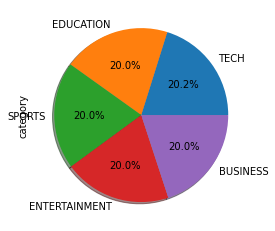

In [12]:
df["category"].value_counts().plot(kind="pie", shadow=True, autopct='%1.1f%%')

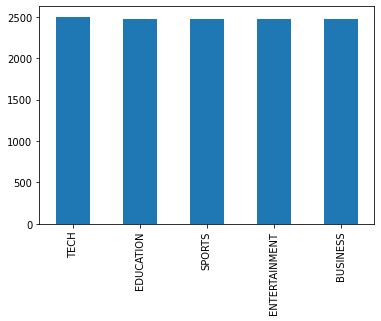

In [13]:
df["category"].value_counts().plot(kind="bar")

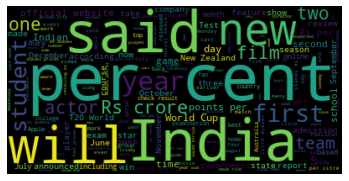

In [14]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df["news_article"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

### Cleaning the datasets 🧹

#### Remove Special Characters

In [15]:
"' '".join(set(" ".join(review for review in df["news_article"])))

'*\' \'ç\' \'[\' \'%\' \'I\' \'M\' \'—\' \'ó\' \'z\' \'J\' \'\n\' \'ý\' \'G\' \'K\' \'#\' \'/\' \'o\' \'2\' \'(\' \'“\' \'`\' \'8\' \'u\' \'3\' \'–\' \'P\' \'~\' \'”\' \'Y\' \'-\' \':\' \'f\' \'n\' \'.\' \',\' \'9\' \'t\' \'\'\' \'Ç\' \'é\' \'€\' \' \' \'’\' \'X\' \'ñ\' \'6\' \'Á\' \'|\' \'7\' \'s\' \'}\' \'á\' \'5\' \'C\' \'x\' \'r\' \'V\' \'i\' \'q\' \'A\' \'F\' \'m\' \'₹\' \')\' \'_\' \'‘\' \'1\' \'\xa0\' \'a\' \'!\' \'e\' \'4\' \']\' \'W\' \'B\' \'c\' \'…\' \'°\' \'p\' \'b\' \'R\' \'g\' \'S\' \'à\' \'k\' \'H\' \'y\' \'h\' \';\' \'N\' \'d\' \'+\' \'\t\' \'T\' \'{\' \'$\' \'0\' \'v\' \'l\' \'D\' \'🔴\' \'j\' \'w\' \'E\' \'í\' \'\u200b\' \'Z\' \'L\' \'&\' \'£\' \'Q\' \'U\' \'@\' \'"\' \'O\' \'?'

In [16]:
# REMOVE SPECIAL CHARs
import re

def filterNonAscii(text):
  split = re.split("\W+", text)
  return " ".join(split)

In [17]:
df["filter1"]= df["news_article"].apply(lambda x: filterNonAscii(x.lower()))

In [18]:
"' '".join(set(" ".join(review for review in df["filter1"])))

"6' 'k' '7' 'y' 'h' 'ç' 's' 'd' 'á' '5' 'ó' '0' 'f' 'x' 'r' 'z' 'i' 'q' 'v' 'm' 'l' '_' 'j' 'n' 'ý' 'w' '1' 'í' 'a' 'e' '4' 'o' 'à' '2' '9' 'c' 't' 'p' 'é' '8' ' ' 'b' 'u' '3' 'g' 'ñ"

#### Remove Stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
def remove_stopwords(text):
  stopwords = set(nltk.corpus.stopwords.words('english'))
  stopwords.update(["br", "href"])
  text=[word for word in text.split(" ") if word not in stopwords]
  return " ".join(text)

In [21]:
df["filter1"]= df["filter1"].apply(lambda x: remove_stopwords(x))
print(df["news_article"][4])
print("-"*170)
print(df["filter1"][4])

The matter was, however, resolved after talks between players' representatives, the England and Wales Cricket Board (ECB), Cricket Australia and the Australian government.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
matter however resolved talks players representatives england wales cricket board ecb cricket australia australian government 


#### Lemmatizing the Words
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.  lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [22]:
from nltk.stem import WordNetLemmatizer
def lemmitize(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text.split(" ")])

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
df["filter2"]= df["filter1"].apply(lambda x: lemmitize(x))
print(df["news_article"][4])
print("-"*170)
print(df["filter2"][4])

The matter was, however, resolved after talks between players' representatives, the England and Wales Cricket Board (ECB), Cricket Australia and the Australian government.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
matter however resolved talk player representative england wale cricket board ecb cricket australia australian government 


In [25]:
sportsDF = df[df["category"]=="SPORTS"]
teachDF = df[df["category"]=="TECH"]
entertainmentDF = df[df["category"]=="ENTERTAINMENT"]
businessDF = df[df["category"]=="BUSINESS"]
educationDF = df[df["category"]=="EDUCATION"]

In [26]:
educationDF.sample(3)

,news_article,category,categoryId,filter1,filter2
10415,The candidates can check the list through the ...,EDUCATION,1,candidates check list website mu ac well websi...,candidate check list website mu ac well websit...
11319,UK universities are preparing for the new seme...,EDUCATION,1,uk universities preparing new semester septemb...,uk university preparing new semester september...
9488,Students can check the allotment result at the...,EDUCATION,1,students check allotment result official websi...,student check allotment result official websit...


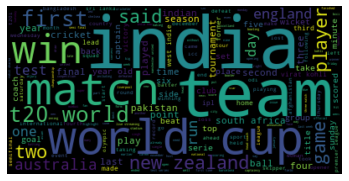

In [27]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in sportsDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

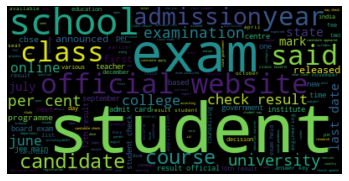

In [28]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in educationDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

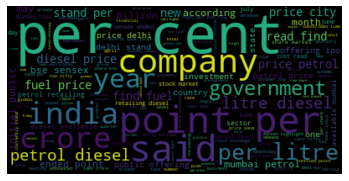

In [29]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in businessDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

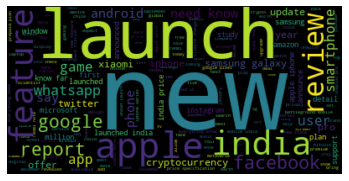

In [30]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in teachDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

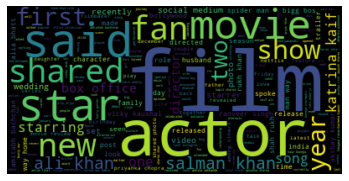

In [31]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in entertainmentDF["filter2"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df["filter2"].values)
y = np.array(df.categoryId.values)
cv = CountVectorizer(max_features = 6000)
x = cv.fit_transform(df.filter2).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (12400, 6000)
y.shape =  (12400,)


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

8680
3720


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [45]:
mdl = LogisticRegression()

In [46]:
oneVsRest = OneVsRestClassifier(mdl)

oneVsRest.fit(x_train, y_train)

y_pred = oneVsRest.predict(x_test)

In [48]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

In [49]:
accuracy

94.03

In [51]:
import seaborn as sns

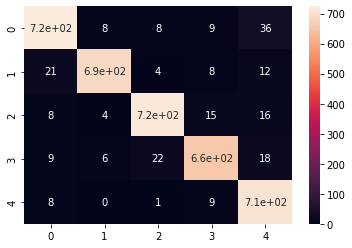

In [53]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)